In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as  sb



In [2]:
df=pd.read_csv("AirQuality.csv")

In [3]:
df.head()


,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.67,39.0,17.67,39.2,32.33,7.07,6.60,0.48,...,33.43,71.67,2.30,226.33,123.67,NaN,-0.1,0.1,0.0,23.05
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.00,39.0,20.50,41.9,35.80,7.40,NaN,0.49,...,33.70,70.00,2.50,223.00,186.00,NaN,-0.1,0.1,0.0,NaN
2,2016-07-01 12:00:00,2016-07-01 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-01 13:00:00,2016-07-01 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.50,50.0,15.40,43.6,32.78,6.35,6.38,0.47,...,33.57,63.50,1.88,223.00,240.50,NaN,-0.1,0.1,0.0,NaN


In [4]:
df.shape


(59150, 23)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59150 entries, 0 to 59149
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   From Date        59150 non-null  object 
 1   To Date          59150 non-null  object 
 2   PM2.5 (ug/m3)    54323 non-null  float64
 3   PM10 (ug/m3)     54450 non-null  float64
 4   NO (ug/m3)       55153 non-null  float64
 5   NO2 (ug/m3)      55100 non-null  float64
 6   NOx (ppb)        55315 non-null  float64
 7   NH3 (ug/m3)      53564 non-null  float64
 8   SO2 (ug/m3)      54285 non-null  float64
 9   CO (mg/m3)       54673 non-null  float64
 10  Ozone (ug/m3)    54567 non-null  float64
 11  Benzene (ug/m3)  55213 non-null  float64
 12  Toluene (ug/m3)  55213 non-null  float64
 13  Temp (degree C)  55113 non-null  float64
 14  RH (%)           55281 non-null  float64
 15  WS (m/s)         55299 non-null  float64
 16  WD (deg)         54656 non-null  float64
 17  SR (W/mt2)  

In [6]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
count,54323.000000,54450.000000,55153.000000,55100.000000,55315.000000,53564.000000,54285.000000,54673.000000,54567.000000,55213.000000,...,55113.000000,55281.000000,55299.000000,54656.000000,54589.000000,1201.000000,55341.000000,55200.000000,55285.000000,55087.000000
mean,29.718423,58.531252,13.077963,39.195409,31.171453,10.057892,5.782241,0.634884,28.681448,0.813874,...,30.296565,71.962430,1.170445,180.160190,72.830661,755.713988,-0.015668,0.316406,0.052524,22.279584
std,21.365617,32.388101,16.124784,30.716953,25.048555,5.949501,4.538823,0.850052,19.189147,1.398240,...,2.885504,13.575538,0.719358,74.972401,131.376023,14.906888,0.165063,1.594764,0.441987,3.006088
min,0.250000,1.000000,0.100000,0.100000,0.000000,0.100000,0.030000,0.000000,0.070000,0.000000,...,7.300000,15.250000,0.080000,1.000000,0.000000,725.000000,-17.600000,0.000000,0.000000,4.680000
25%,13.250000,34.000000,3.800000,17.400000,13.780000,6.200000,3.650000,0.350000,16.370000,0.330000,...,28.770000,62.500000,0.600000,123.750000,3.000000,751.500000,-0.100000,0.030000,0.000000,20.200000
50%,24.000000,53.500000,8.100000,30.650000,24.880000,8.420000,5.150000,0.570000,22.380000,0.600000,...,29.880000,73.750000,1.050000,183.500000,8.000000,755.250000,-0.030000,0.100000,0.000000,22.050000
75%,42.500000,78.500000,16.170000,52.950000,41.150000,12.200000,6.970000,0.790000,36.000000,1.100000,...,31.350000,84.000000,1.600000,235.250000,71.000000,758.000000,0.030000,0.250000,0.000000,24.250000
max,449.500000,929.000000,288.170000,313.650000,364.800000,195.200000,199.770000,41.100000,199.700000,118.520000,...,59.900000,92.330000,34.850000,360.000000,956.000000,1050.000000,1.700000,127.850000,30.000000,35.350000


In [7]:
df.describe(include="all")

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
count,59150,59150,54323.000000,54450.000000,55153.000000,55100.000000,55315.000000,53564.000000,54285.000000,54673.000000,...,55113.000000,55281.000000,55299.000000,54656.000000,54589.000000,1201.000000,55341.000000,55200.000000,55285.000000,55087.000000
unique,59150,59150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-03-31 23:00:00,2023-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,29.718423,58.531252,13.077963,39.195409,31.171453,10.057892,5.782241,0.634884,...,30.296565,71.962430,1.170445,180.160190,72.830661,755.713988,-0.015668,0.316406,0.052524,22.279584
std,NaN,NaN,21.365617,32.388101,16.124784,30.716953,25.048555,5.949501,4.538823,0.850052,...,2.885504,13.575538,0.719358,74.972401,131.376023,14.906888,0.165063,1.594764,0.441987,3.006088
min,NaN,NaN,0.250000,1.000000,0.100000,0.100000,0.000000,0.100000,0.030000,0.000000,...,7.300000,15.250000,0.080000,1.000000,0.000000,725.000000,-17.600000,0.000000,0.000000,4.680000
25%,NaN,NaN,13.250000,34.000000,3.800000,17.400000,13.780000,6.200000,3.650000,0.350000,...,28.770000,62.500000,0.600000,123.750000,3.000000,751.500000,-0.100000,0.030000,0.000000,20.200000
50%,NaN,NaN,24.000000,53.500000,8.100000,30.650000,24.880000,8.420000,5.150000,0.570000,...,29.880000,73.750000,1.050000,183.500000,8.000000,755.250000,-0.030000,0.100000,0.000000,22.050000
75%,NaN,NaN,42.500000,78.500000,16.170000,52.950000,41.150000,12.200000,6.970000,0.790000,...,31.350000,84.000000,1.600000,235.250000,71.000000,758.000000,0.030000,0.250000,0.000000,24.250000


In [8]:
df.isnull().sum()

From Date              0
To Date                0
PM2.5 (ug/m3)       4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64

In [9]:
df.columns.tolist()

['From Date',
 'To Date',
 'PM2.5 (ug/m3)',
 'PM10 (ug/m3)',
 'NO (ug/m3)',
 'NO2 (ug/m3)',
 'NOx (ppb)',
 'NH3 (ug/m3)',
 'SO2 (ug/m3)',
 'CO (mg/m3)',
 'Ozone (ug/m3)',
 'Benzene (ug/m3)',
 'Toluene (ug/m3)',
 'Temp (degree C)',
 'RH (%)',
 'WS (m/s)',
 'WD (deg)',
 'SR (W/mt2)',
 'BP (mmHg)',
 'VWS (m/s)',
 'Xylene (ug/m3)',
 'RF (mm)',
 'AT (degree C)']

In [10]:
for col in df.columns:
  print(df[col].unique())

['2016-07-01 10:00:00' '2016-07-01 11:00:00' '2016-07-01 12:00:00' ...
 '2023-03-31 21:00:00' '2023-03-31 22:00:00' '2023-03-31 23:00:00']
['2016-07-01 11:00:00' '2016-07-01 12:00:00' '2016-07-01 13:00:00' ...
 '2023-03-31 22:00:00' '2023-03-31 23:00:00' '2023-04-01 00:00:00']
[1.0670e+01 2.0000e+00        nan 2.0500e+01 1.5250e+01 1.1670e+01
 1.1750e+01 1.8000e+01 1.2000e+01 1.4500e+01 1.2500e+01 1.1000e+01
 7.0000e+00 2.3250e+01 1.9750e+01 2.3000e+01 1.8250e+01 2.1000e+01
 1.9670e+01 2.1250e+01 1.7500e+01 2.2000e+01 2.4750e+01 3.1750e+01
 2.8000e+01 2.2750e+01 2.0250e+01 1.4000e+01 1.4330e+01 1.7000e+01
 5.7500e+00 6.2500e+00 9.3300e+00 1.0000e+01 1.3500e+01 8.5000e+00
 2.1500e+01 1.6330e+01 8.2500e+00 1.0330e+01 1.4750e+01 1.9250e+01
 2.9750e+01 1.6500e+01 2.2500e+01 2.5000e+00 4.5000e+00 5.5000e+00
 3.5000e+00 1.7500e+00 1.5000e+00 3.8000e+01 1.0500e+01 3.2500e+00
 4.7500e+00 1.6700e+00 1.2500e+00 4.0000e+00 8.0000e+00 5.2500e+00
 6.5000e+00 6.0000e+00 2.7500e+00 4.3300e+00 3.0000e

In [11]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col] = df[col].fillna(df[col].mean())

In [12]:
# df.isnull().sum().sum()
df.isnull().sum()

From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (deg)           0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
Xylene (ug/m3)     0
RF (mm)            0
AT (degree C)      0
dtype: int64

array([[<Axes: title={'center': 'PM2.5 (ug/m3)'}>,
        <Axes: title={'center': 'PM10 (ug/m3)'}>,
        <Axes: title={'center': 'NO (ug/m3)'}>,
        <Axes: title={'center': 'NO2 (ug/m3)'}>,
        <Axes: title={'center': 'NOx (ppb)'}>],
       [<Axes: title={'center': 'NH3 (ug/m3)'}>,
        <Axes: title={'center': 'SO2 (ug/m3)'}>,
        <Axes: title={'center': 'CO (mg/m3)'}>,
        <Axes: title={'center': 'Ozone (ug/m3)'}>,
        <Axes: title={'center': 'Benzene (ug/m3)'}>],
       [<Axes: title={'center': 'Toluene (ug/m3)'}>,
        <Axes: title={'center': 'Temp (degree C)'}>,
        <Axes: title={'center': 'RH (%)'}>,
        <Axes: title={'center': 'WS (m/s)'}>,
        <Axes: title={'center': 'WD (deg)'}>],
       [<Axes: title={'center': 'SR (W/mt2)'}>,
        <Axes: title={'center': 'BP (mmHg)'}>,
        <Axes: title={'center': 'VWS (m/s)'}>,
        <Axes: title={'center': 'Xylene (ug/m3)'}>,
        <Axes: title={'center': 'RF (mm)'}>],
       [<Axes: title

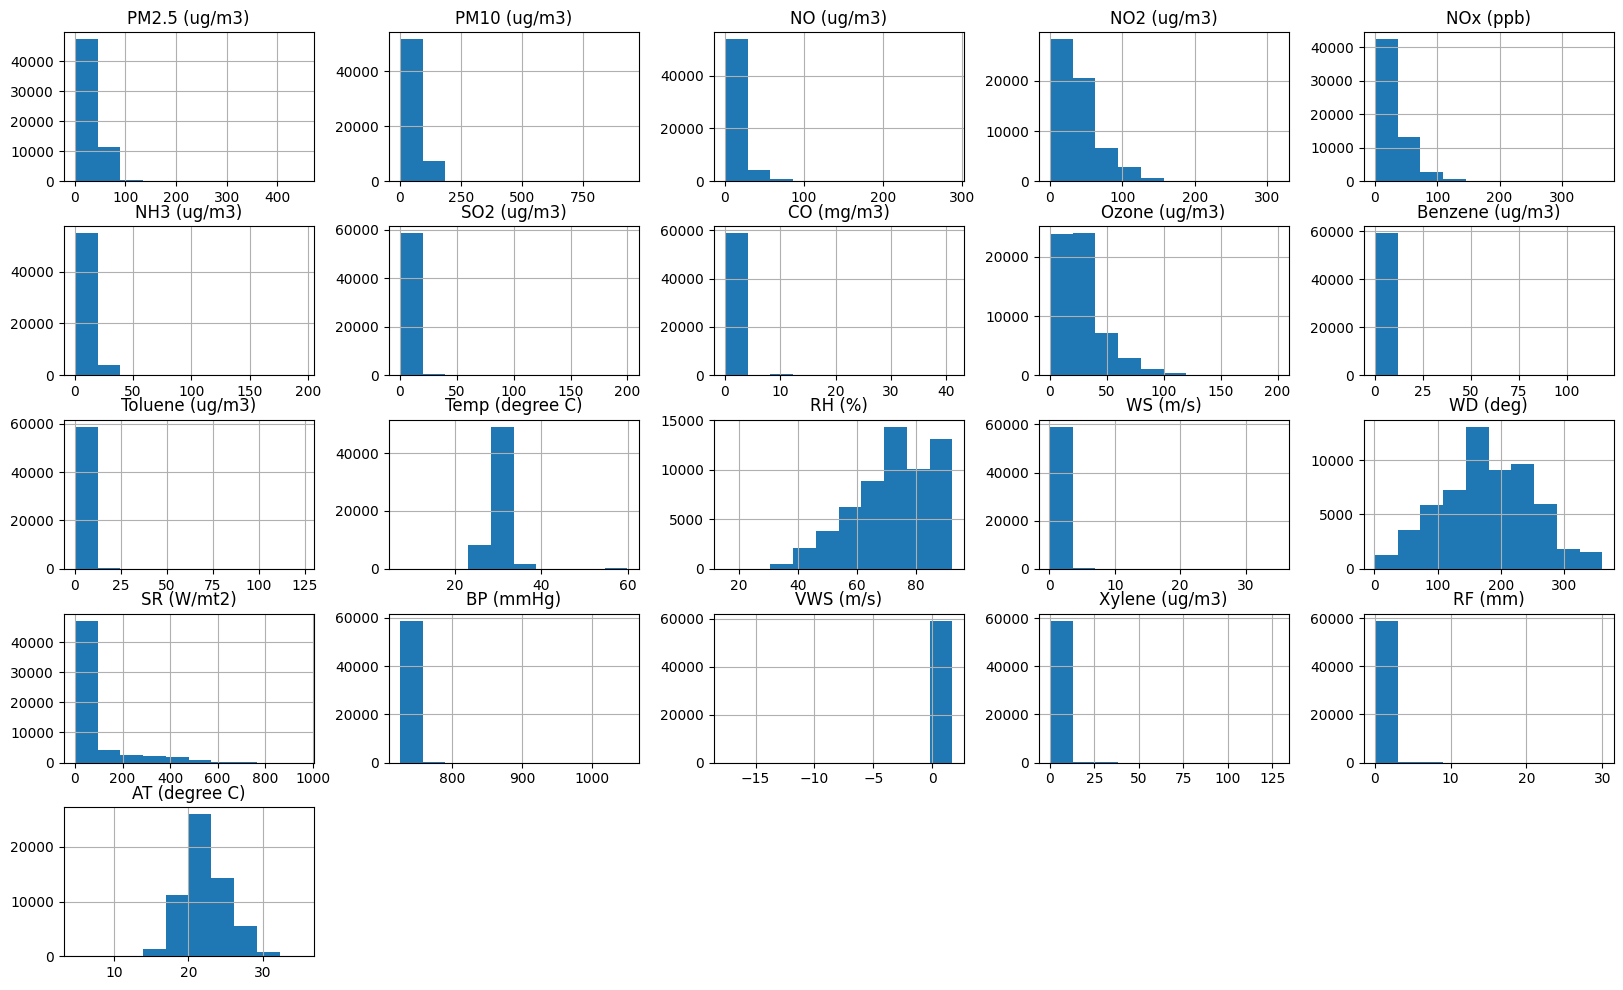

In [13]:
df.hist(figsize=(20,12))


### Univariate Analysis


In [14]:
if df[col].dtype in ['int64', 'float64']:
            print(df[col].describe())

count    59150.000000
mean        22.279584
std          2.901006
min          4.680000
25%         20.350000
50%         22.279584
75%         24.050000
max         35.350000
Name: AT (degree C), dtype: float64


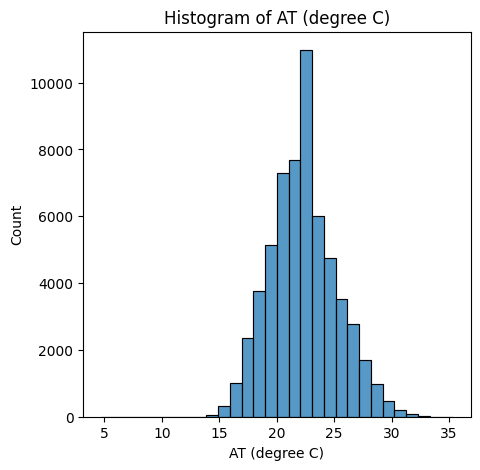

In [15]:
plt.figure(figsize=(5, 5))
sb.histplot(df[col], bins=30)
plt.title(f"Histogram of {col}")
plt.show()

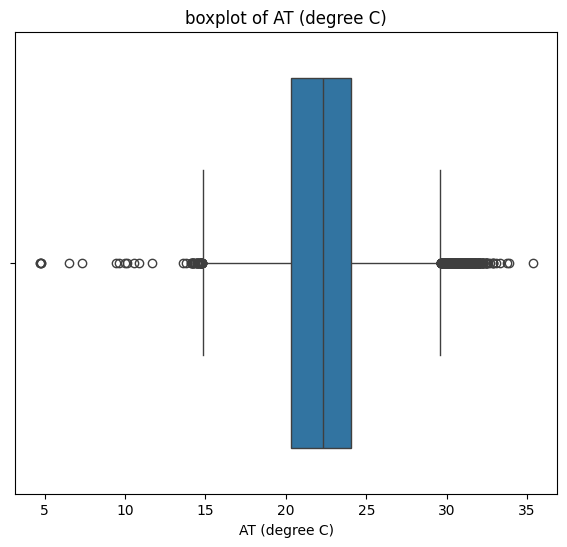

In [16]:
plt.figure(figsize=(7,6))
sb.boxplot(x=df[col])
plt.title(f"boxplot of {col}")
plt.show()

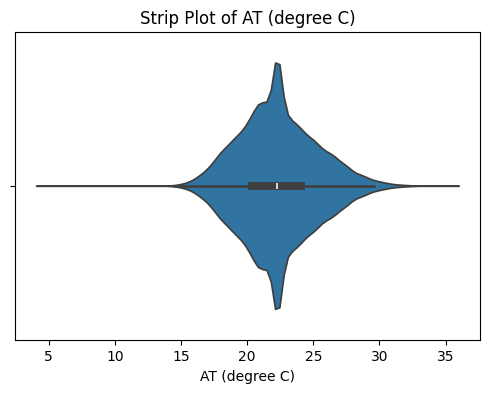

In [17]:
# Violin Plot
plt.figure(figsize=(6, 4))
sb.violinplot(x=df[col])
plt.title(f"Strip Plot of {col}")
plt.show()

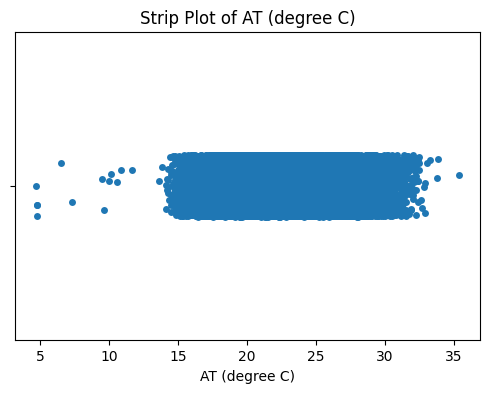

In [18]:
# Strip Plot
plt.figure(figsize=(6, 4))
sb.stripplot(x=df[col], jitter=True)
plt.title(f"Strip Plot of {col}")
plt.show()


In [19]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 626


In [20]:
skewness = df[col].skew()
kurtosis = df[col].kurt()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')

Skewness: 0.27545474876756915
Kurtosis: 0.1412878731793774


In [21]:
if df[col].dtype == 'object':  # Ensure correct dtype comparison
    print(df[col].value_counts()) 

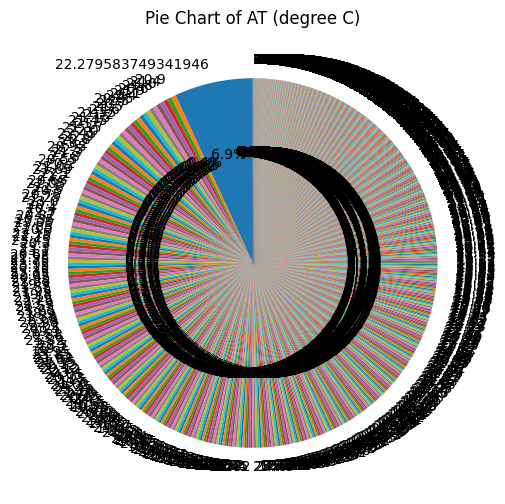

In [22]:
plt.figure(figsize=(6, 6))
df[col].value_counts().plot.pie(autopct="%1.1f%%", startangle=90)
plt.title(f"Pie Chart of {col}")
plt.ylabel("")
plt.show()

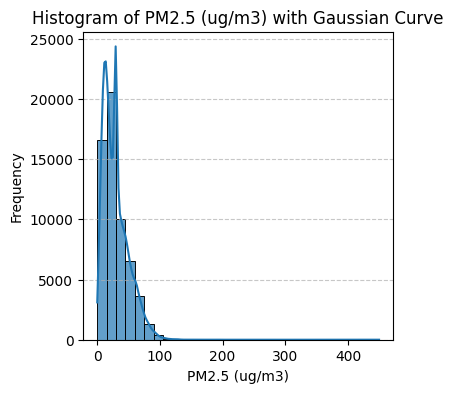

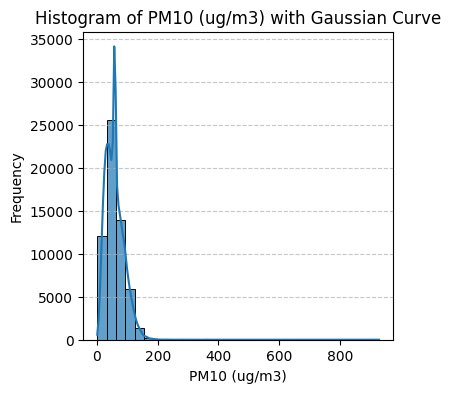

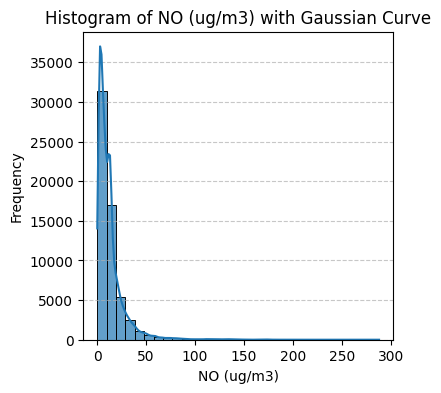

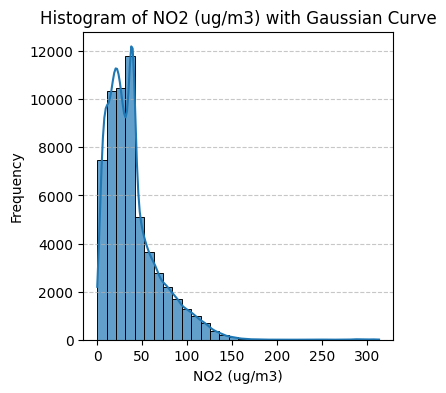

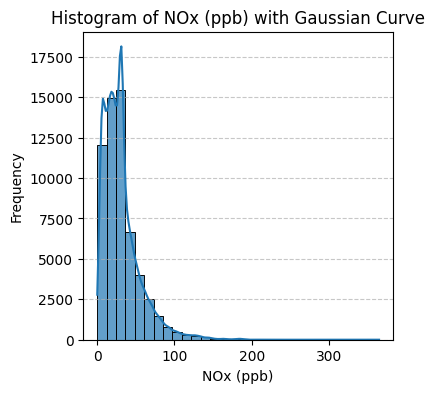

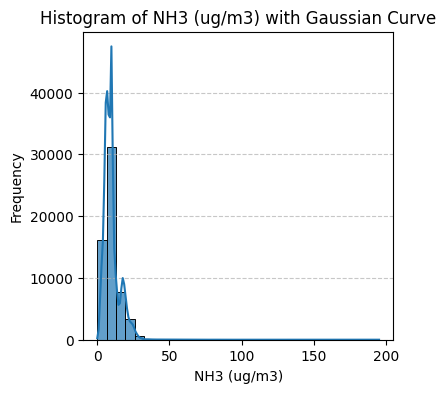

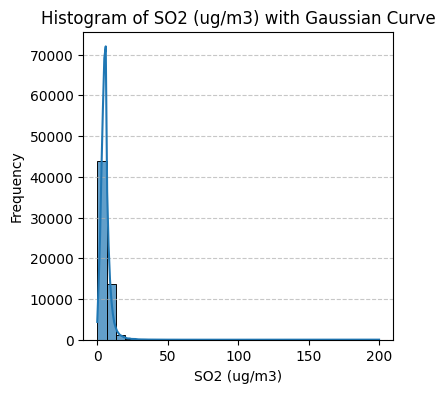

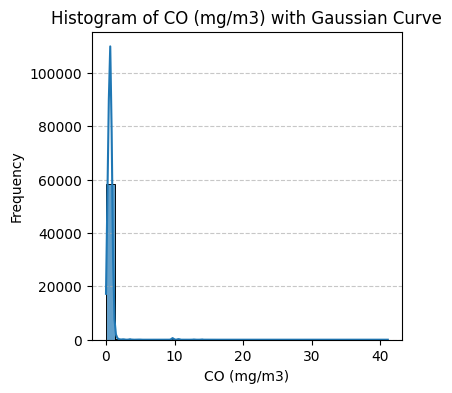

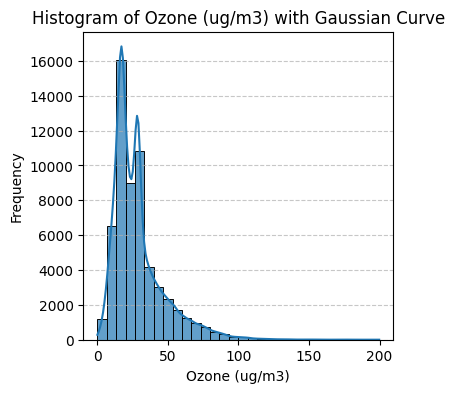

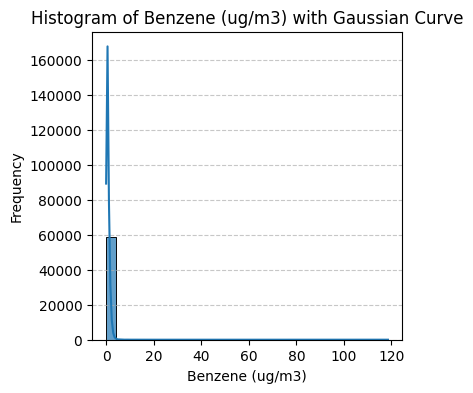

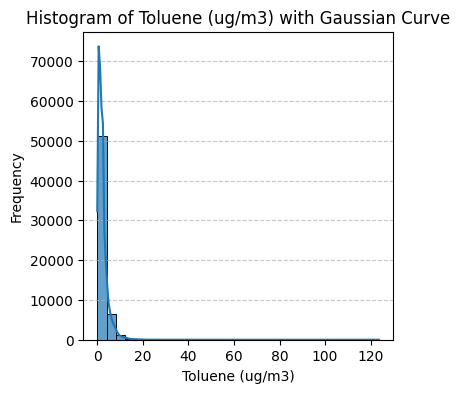

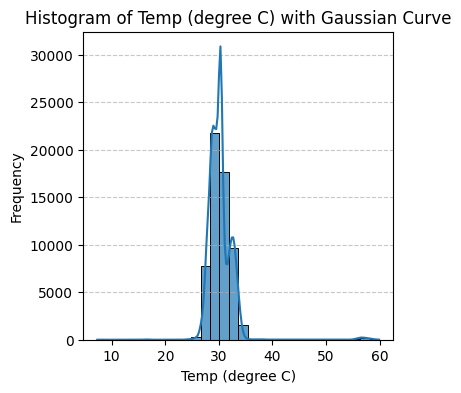

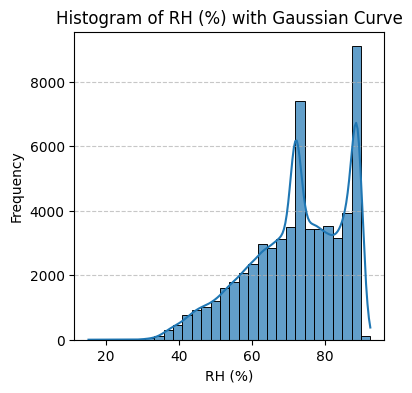

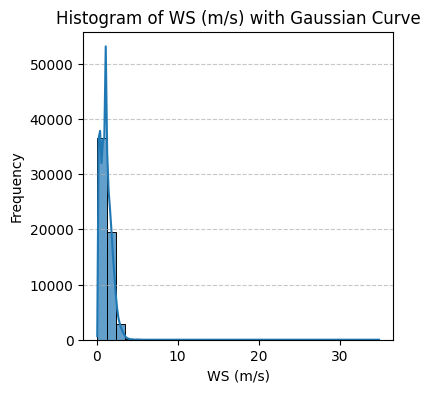

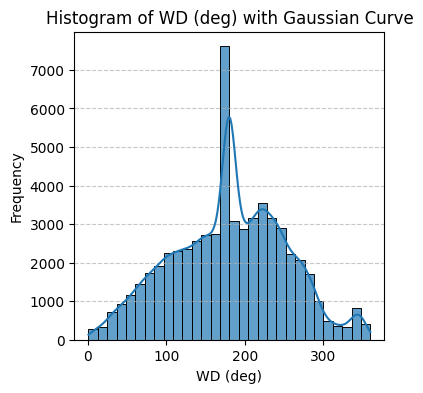

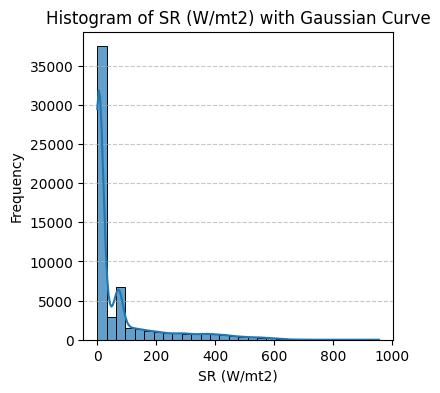

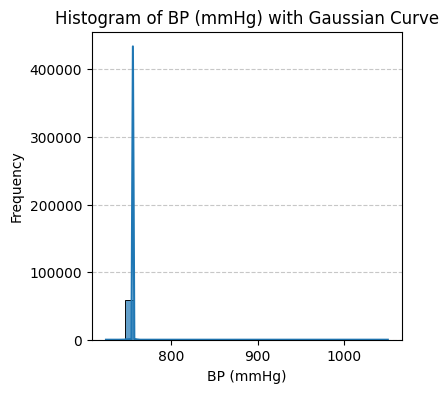

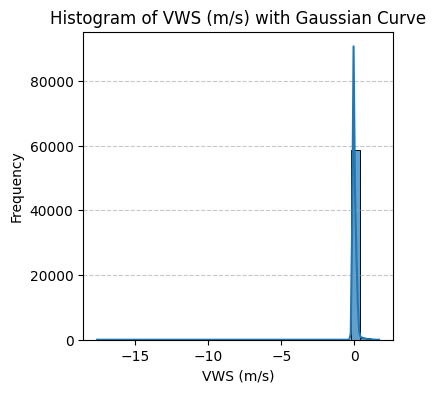

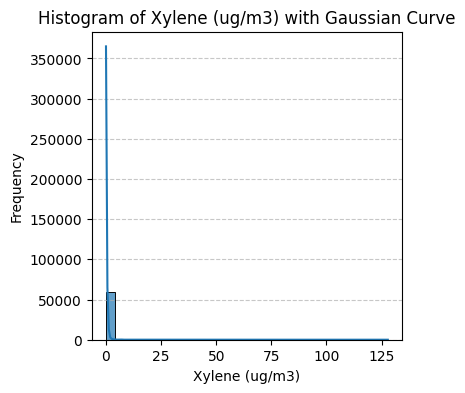

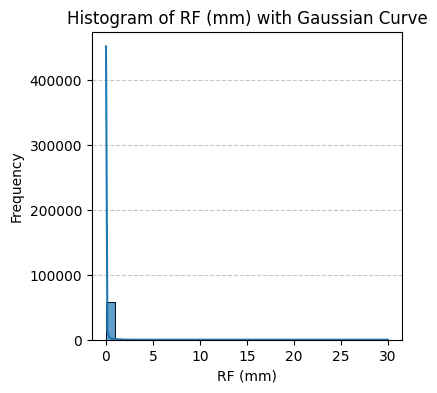

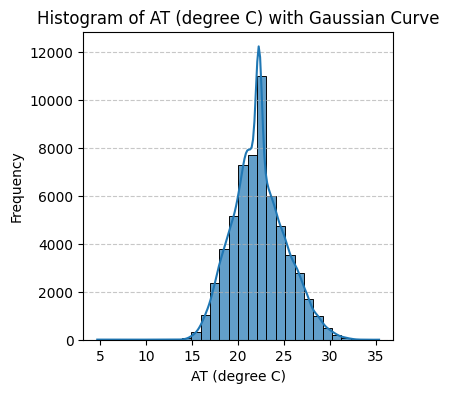

In [23]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(4, 4))
    sb.histplot(df[column].dropna(), bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column} with Gaussian Curve')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

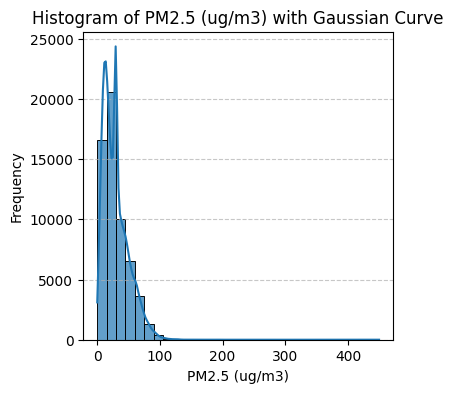

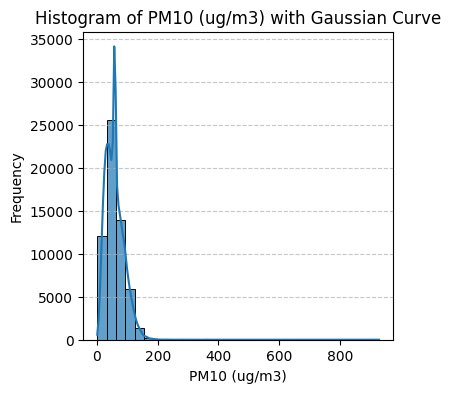

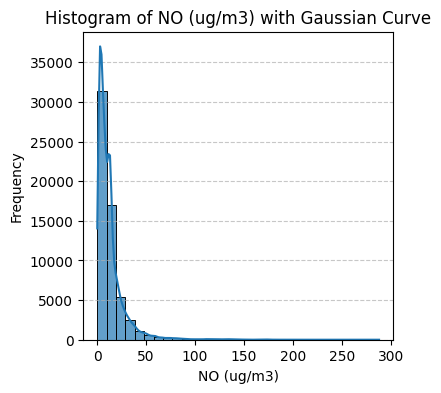

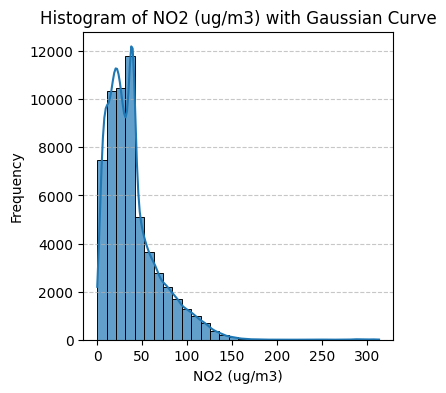

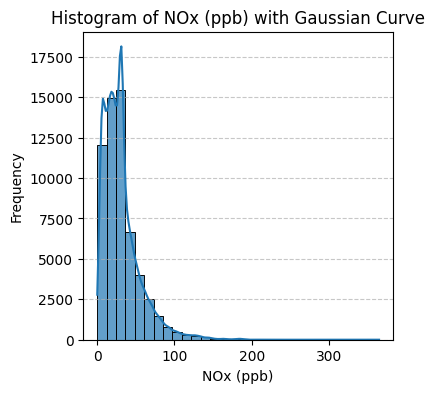

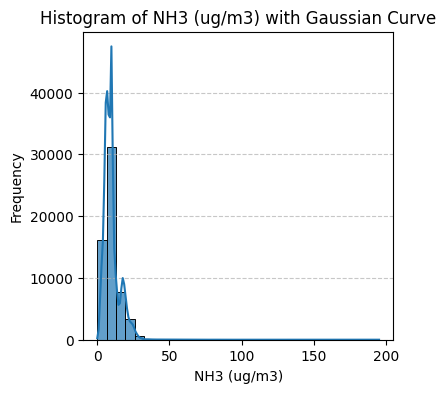

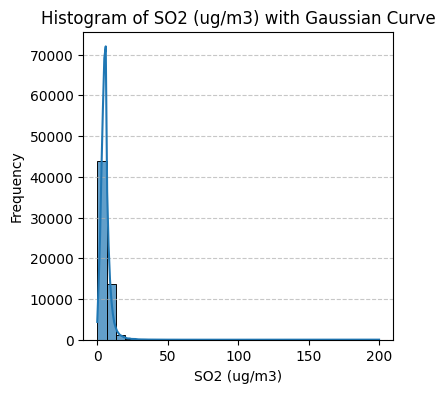

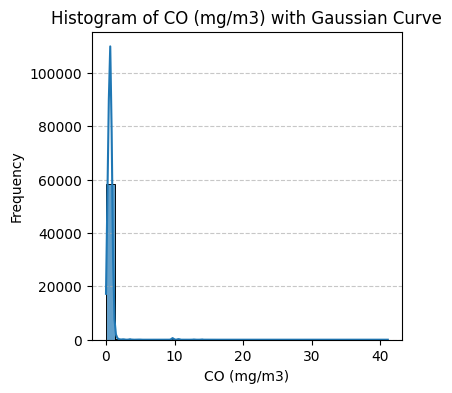

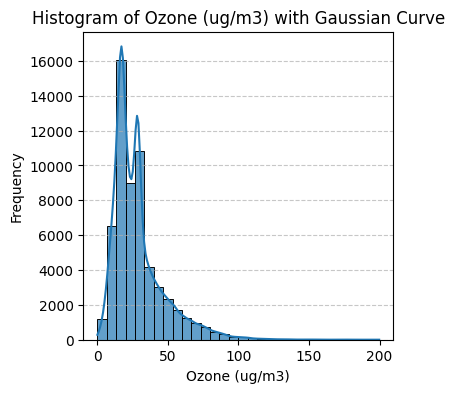

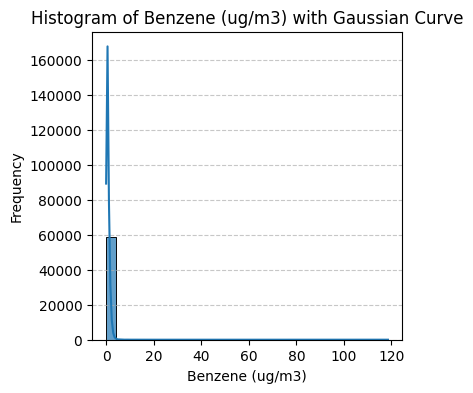

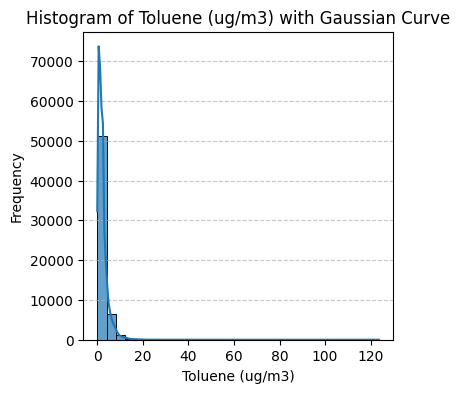

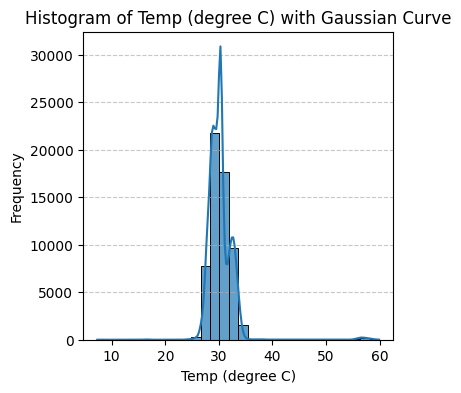

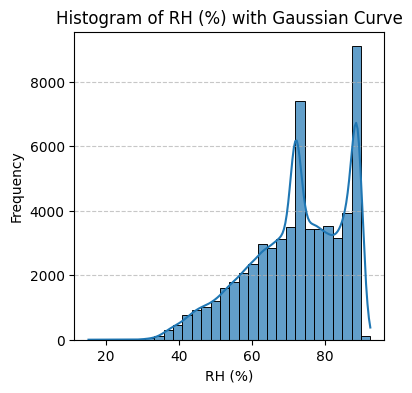

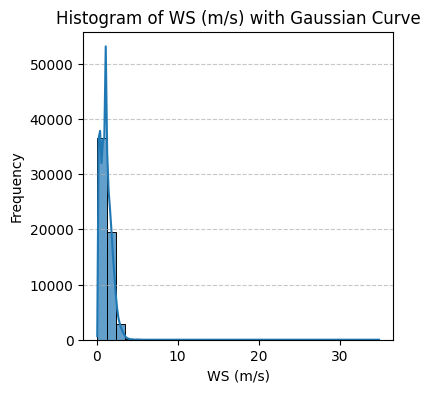

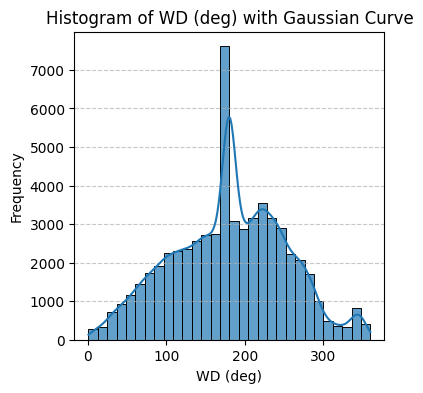

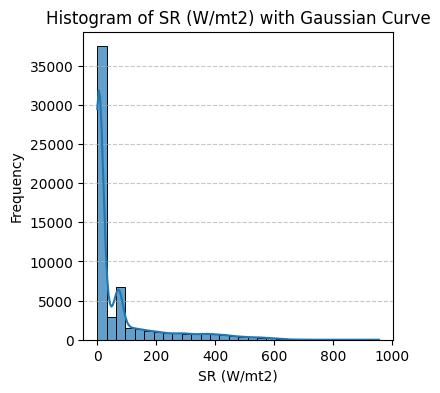

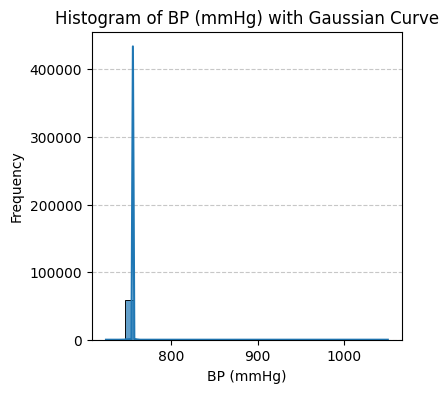

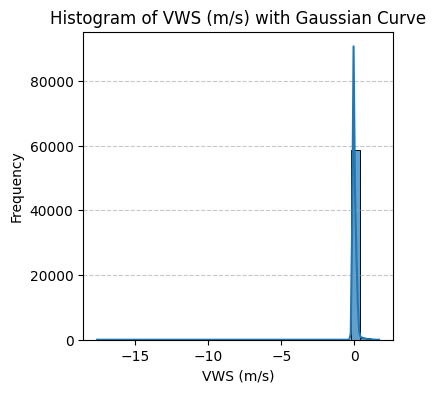

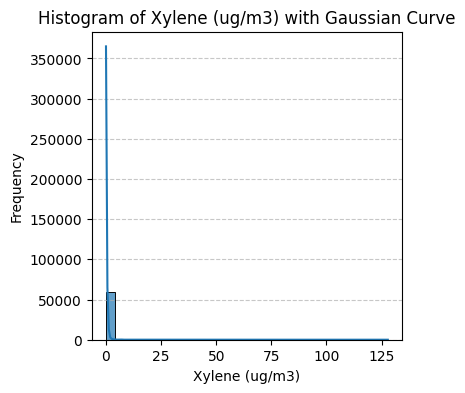

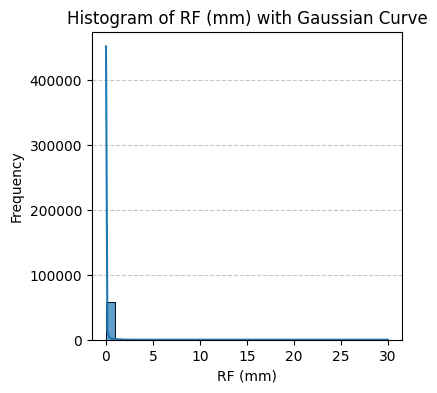

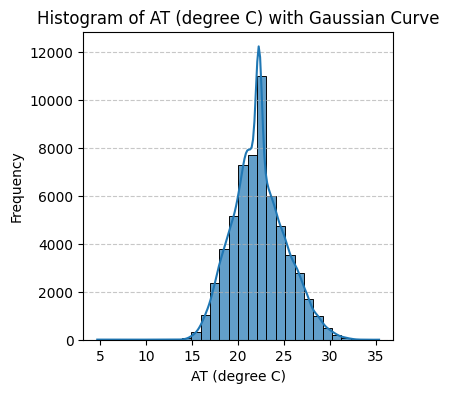

In [24]:
numerical_columns = df.select_dtypes(include=['number']).columns

for column in numerical_columns:
    plt.figure(figsize=(4, 4))
    sb.histplot(df[column].dropna(), bins=30, kde=True, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column} with Gaussian Curve')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### BIVARIATE ANALYSIS

In [25]:
print(df.columns)


Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'Xylene (ug/m3)', 'RF (mm)', 'AT (degree C)'],
      dtype='object')


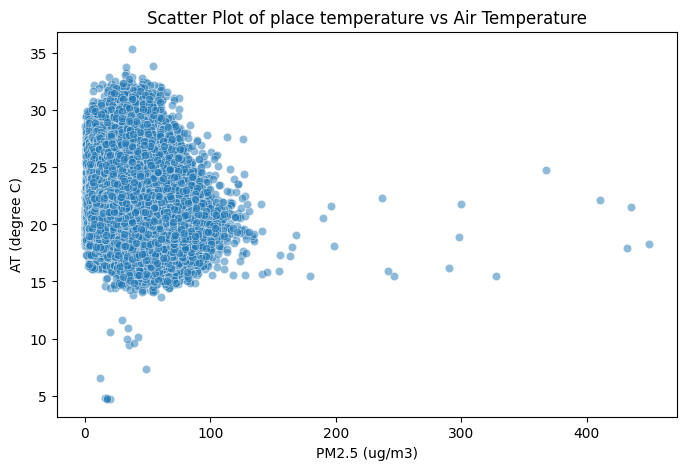

In [26]:

# Scatter plot
plt.figure(figsize=(8, 5))
sb.scatterplot(x=df['PM2.5 (ug/m3)'], y=df['AT (degree C)'], alpha=0.5)
# Labels and title
plt.xlabel("PM2.5 (ug/m3)")
plt.ylabel("AT (degree C)")
plt.title("Scatter Plot of place temperature vs Air Temperature")

plt.show()

### to display sscatter plot of each and every dataset with each other
# Loop through all pairs of numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):  # Avoid repeating plots
        plt.figure(figsize=(8, 5))
        sb.scatterplot(x=df[numerical_columns[i]], y=df[numerical_columns[j]], alpha=0.7)
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title(f'Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}')
        plt.show()

In [27]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

print("Correlation Matrix (Numerical Columns Only):")
print(correlation_matrix)

Correlation Matrix (Numerical Columns Only):
                 PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
PM2.5 (ug/m3)         1.000000      0.832929    0.173922     0.448989   
PM10 (ug/m3)          0.832929      1.000000    0.166912     0.458671   
NO (ug/m3)            0.173922      0.166912    1.000000     0.461902   
NO2 (ug/m3)           0.448989      0.458671    0.461902     1.000000   
NOx (ppb)             0.383957      0.385611    0.812863     0.886280   
NH3 (ug/m3)           0.115674      0.197814    0.118999     0.167999   
SO2 (ug/m3)           0.281470      0.273531    0.037742     0.123084   
CO (mg/m3)            0.124559      0.084872    0.046708     0.062507   
Ozone (ug/m3)         0.221563      0.241484   -0.257787    -0.080591   
Benzene (ug/m3)       0.312591      0.260773    0.120040     0.195416   
Toluene (ug/m3)       0.205437      0.170370    0.201197     0.274144   
Temp (degree C)       0.066685      0.084391    0.097291     0.343322   
RH (%)

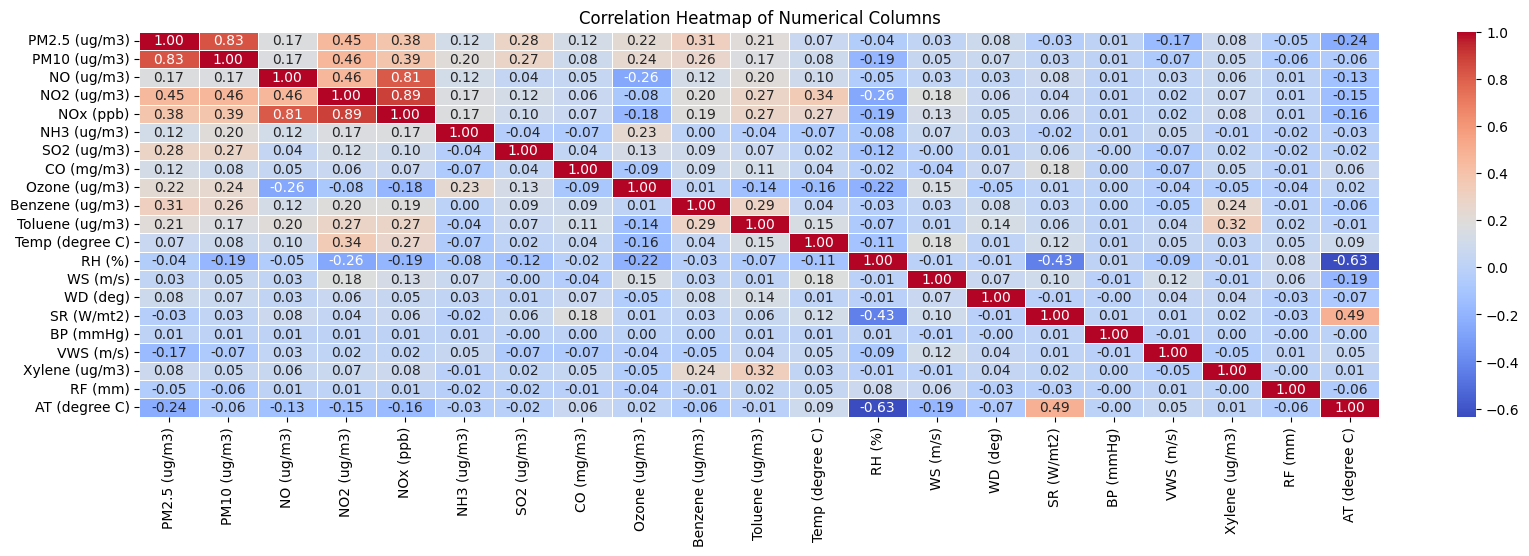

In [28]:
#Heatmap

plt.figure(figsize=(20, 5))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### T-Test ###

In [29]:
df['PM2.5 (ug/m3)'] = pd.to_numeric(df['PM2.5 (ug/m3)'], errors='coerce')
df['NO2 (ug/m3)'] = pd.to_numeric(df['NO2 (ug/m3)'], errors='coerce')

In [30]:
from scipy import stats


t_stat, p_value = stats.ttest_rel(df['PM2.5 (ug/m3)'], df['NO2 (ug/m3)'])

In [31]:
if p_value < 0.05:
    print("There is a significant difference between ' PM(2.5)' and 'NO2'.")
else:
    print("There is no significant difference.")

There is a significant difference between ' PM(2.5)' and 'NO2'.


# Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
# Drop non-numeric and date columns
X = df.drop(columns=['From Date', 'To Date', 'PM2.5 (ug/m3)'])
y = df['PM2.5 (ug/m3)']

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 6.113537745887805


## Result Visualization

<Axes: title={'center': 'Actual vs Predicted PM2.5'}, xlabel='Actual PM2.5', ylabel='Predicted PM2.5'>

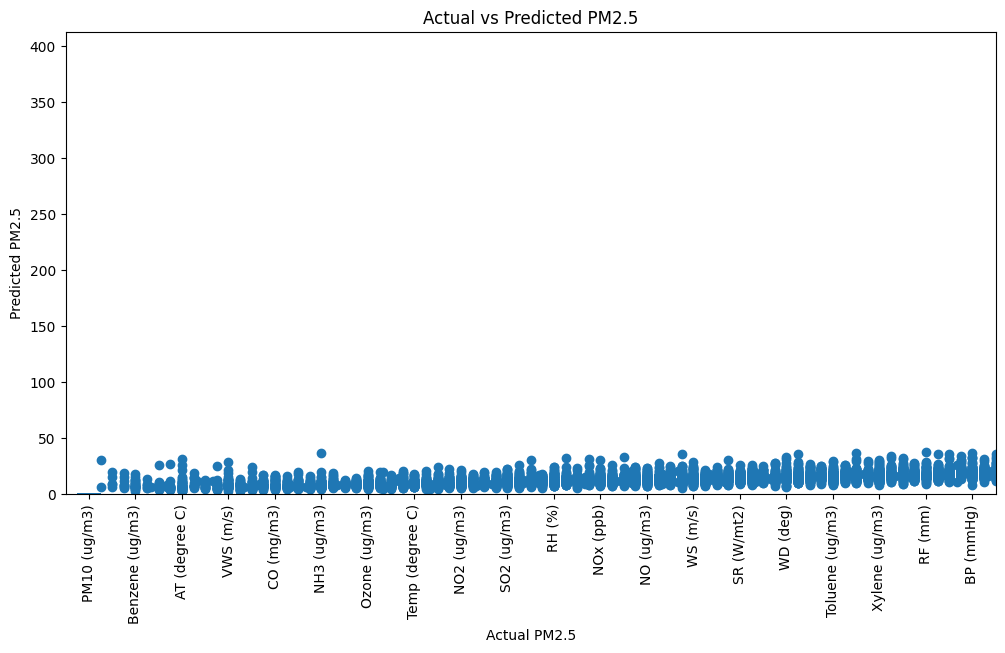

In [37]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Actual vs Predicted PM2.5")

# Feature importances
importances = model.feature_importances_
features = X.columns
pd.Series(importances, index=features).sort_values(ascending=False).plot(kind='bar', figsize=(12,6))


In [38]:
#import joblib
#joblib.dump(model, 'pm25_model.pkl')
